# Climate analysis

In [1]:
import pandas as pd 
import numpy as np 
from datetime import datetime, timedelta
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
from plotly.subplots import make_subplots 
import plotly.express as px 



In [2]:
df = pd.read_excel('82210-1.xlsx')
df.head()

,Y,M,D,T,TM,Tm,SLP,STP,H,PP,VV,V,VM,VG,FG,RA,SN,GR,TS,TR
0,1991,1,1,5.3,9.6,0.0,-,-,86,0,3.4,2.4,13,-,1,0,0,0,0,0
1,1991,1,2,2.6,6.4,0.0,-,-,88,0,3.7,4.1,11.1,-,1,0,0,0,0,0
2,1991,1,3,2.3,5.2,-1.0,-,-,87,0,2.6,2.0,9.4,-,1,0,0,0,0,0
3,1991,1,4,3.9,10.0,0.0,-,-,63,0,8.0,4.4,25.9,-,1,0,0,0,0,0
4,1991,1,5,2.9,10.4,-3.0,-,-,69,0,10.5,5.2,18.3,-,0,0,0,0,0,0


In [3]:
df.tail()

,Y,M,D,T,TM,Tm,SLP,STP,H,PP,VV,V,VM,VG,FG,RA,SN,GR,TS,TR
1821,1995,12,27,9.7,11.0,6.5,1008.8,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1995,12,28,11.3,14.0,8.0,1012.8,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1995,12,29,9.0,10.2,7.6,1011.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1995,12,30,11.5,14.0,8.8,1001.6,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0,0
1825,1995,12,31,11.3,14.0,8.0,1004.8,937.7,79,1.02,12.4,19.8,37,51.9,0,1,0,0,0,0


In [4]:
df.shape

(1826, 20)

In [5]:
df = df.rename(columns = {"Y" : 'year', "M" : 'month', "D" : "day", "T" : "avg_temp", "TM" : "max_temp", "Tm" : "min_temp", "SLP" : "avg_atm_sea", "STP" : "avg_atm_station", "H" : "humidity", "PP" : "rain", "VV" : "avg_visibility", "V" : "avg_wind", "VM" : "max_sustained_wind" , "VG" : "max_wind", "FG" : "occ_Fog", "RA" : "occ_Rain", "SN" : "occ_Snow", "GR" : "occ_Hail", "TS" : "occ_Thunder", "TR" : "occ_Tornado"})

In [6]:
df.columns

Index(['year', 'month', 'day', 'avg_temp', 'max_temp', 'min_temp',
       'avg_atm_sea', 'avg_atm_station', 'humidity', 'rain', 'avg_visibility',
       'avg_wind', 'max_sustained_wind', 'max_wind', 'occ_Fog', 'occ_Rain',
       'occ_Snow', 'occ_Hail', 'occ_Thunder', 'occ_Tornado'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1826 non-null   int64  
 1   month               1826 non-null   int64  
 2   day                 1826 non-null   int64  
 3   avg_temp            1826 non-null   float64
 4   max_temp            1826 non-null   float64
 5   min_temp            1826 non-null   float64
 6   avg_atm_sea         1826 non-null   object 
 7   avg_atm_station     1826 non-null   object 
 8   humidity            1826 non-null   object 
 9   rain                1826 non-null   object 
 10  avg_visibility      1826 non-null   float64
 11  avg_wind            1826 non-null   float64
 12  max_sustained_wind  1826 non-null   object 
 13  max_wind            1826 non-null   object 
 14  occ_Fog             1826 non-null   int64  
 15  occ_Rain            1826 non-null   int64  
 16  occ_Sn

In [8]:
df.isna().any()

year                  False
month                 False
day                   False
avg_temp              False
max_temp              False
min_temp              False
avg_atm_sea           False
avg_atm_station       False
humidity              False
rain                  False
avg_visibility        False
avg_wind              False
max_sustained_wind    False
max_wind              False
occ_Fog               False
occ_Rain              False
occ_Snow              False
occ_Hail              False
occ_Thunder           False
occ_Tornado           False
dtype: bool

In [9]:
df.dtypes

year                    int64
month                   int64
day                     int64
avg_temp              float64
max_temp              float64
min_temp              float64
avg_atm_sea            object
avg_atm_station        object
humidity               object
rain                   object
avg_visibility        float64
avg_wind              float64
max_sustained_wind     object
max_wind               object
occ_Fog                 int64
occ_Rain                int64
occ_Snow                int64
occ_Hail                int64
occ_Thunder             int64
occ_Tornado             int64
dtype: object

### missing values

In [10]:
df["avg_atm_sea"].describe()

count     1826
unique     272
top          -
freq       925
Name: avg_atm_sea, dtype: object

In [11]:
df["avg_atm_sea"].value_counts()

-         925
1013.1     11
1013.7     11
1018.8     11
1017.9     10
         ... 
1007.7      1
1033.4      1
1031.8      1
1024.8      1
1004.8      1
Name: avg_atm_sea, Length: 272, dtype: int64

In [12]:
df = df.replace("-", np.NaN)
df.head()

,year,month,day,avg_temp,max_temp,min_temp,avg_atm_sea,avg_atm_station,humidity,rain,avg_visibility,avg_wind,max_sustained_wind,max_wind,occ_Fog,occ_Rain,occ_Snow,occ_Hail,occ_Thunder,occ_Tornado
0,1991,1,1,5.3,9.6,0.0,NaN,NaN,86.0,0.0,3.4,2.4,13.0,NaN,1,0,0,0,0,0
1,1991,1,2,2.6,6.4,0.0,NaN,NaN,88.0,0.0,3.7,4.1,11.1,NaN,1,0,0,0,0,0
2,1991,1,3,2.3,5.2,-1.0,NaN,NaN,87.0,0.0,2.6,2.0,9.4,NaN,1,0,0,0,0,0
3,1991,1,4,3.9,10.0,0.0,NaN,NaN,63.0,0.0,8.0,4.4,25.9,NaN,1,0,0,0,0,0
4,1991,1,5,2.9,10.4,-3.0,NaN,NaN,69.0,0.0,10.5,5.2,18.3,NaN,0,0,0,0,0,0


In [13]:
df.isna().any()

year                  False
month                 False
day                   False
avg_temp              False
max_temp              False
min_temp              False
avg_atm_sea            True
avg_atm_station        True
humidity               True
rain                   True
avg_visibility        False
avg_wind              False
max_sustained_wind     True
max_wind               True
occ_Fog               False
occ_Rain              False
occ_Snow              False
occ_Hail              False
occ_Thunder           False
occ_Tornado           False
dtype: bool

In [14]:
df.isnull().sum()

year                     0
month                    0
day                      0
avg_temp                 0
max_temp                 0
min_temp                 0
avg_atm_sea            925
avg_atm_station        274
humidity                 4
rain                     2
avg_visibility           0
avg_wind                 0
max_sustained_wind       5
max_wind              1503
occ_Fog                  0
occ_Rain                 0
occ_Snow                 0
occ_Hail                 0
occ_Thunder              0
occ_Tornado              0
dtype: int64

In [15]:
df[['avg_temp', 'max_temp', 'min_temp', 'avg_atm_sea', 'avg_atm_station', 'humidity', 'rain', 'avg_visibility', 'avg_wind', 'max_sustained_wind', 'max_wind']].mean()

avg_temp                14.446057
max_temp                21.146331
min_temp                 7.775685
avg_atm_sea           1017.692342
avg_atm_station        950.897229
humidity                58.526894
rain                     1.075214
avg_visibility          10.882037
avg_wind                 9.355641
max_sustained_wind      22.518177
max_wind                48.328483
dtype: float64

In [16]:
df['humidity'].fillna(value = df['humidity'].mean(), inplace=True)
df['rain'].fillna(value = df['rain'].mean(), inplace=True)
df['avg_atm_sea'].fillna(value = df['avg_atm_sea'].mean(), inplace=True)
df['avg_atm_station'].fillna(value = df['avg_atm_station'].mean(), inplace=True)
df['max_sustained_wind'].fillna(value = df['max_sustained_wind'].mean(), inplace=True)
df['max_wind'].fillna(value = df['max_wind'].mean(), inplace=True)

In [17]:
df.isnull().sum()

year                  0
month                 0
day                   0
avg_temp              0
max_temp              0
min_temp              0
avg_atm_sea           0
avg_atm_station       0
humidity              0
rain                  0
avg_visibility        0
avg_wind              0
max_sustained_wind    0
max_wind              0
occ_Fog               0
occ_Rain              0
occ_Snow              0
occ_Hail              0
occ_Thunder           0
occ_Tornado           0
dtype: int64

### date

In [18]:
df['date'] = (df['day'].astype(str) + '/' + df['month'].astype(str) + '/' + df['year'].astype(str))
df.head()

,year,month,day,avg_temp,max_temp,min_temp,avg_atm_sea,avg_atm_station,humidity,rain,...,avg_wind,max_sustained_wind,max_wind,occ_Fog,occ_Rain,occ_Snow,occ_Hail,occ_Thunder,occ_Tornado,date
0,1991,1,1,5.3,9.6,0.0,1017.692342,950.897229,86.0,0.0,...,2.4,13.0,48.328483,1,0,0,0,0,0,1/1/1991
1,1991,1,2,2.6,6.4,0.0,1017.692342,950.897229,88.0,0.0,...,4.1,11.1,48.328483,1,0,0,0,0,0,2/1/1991
2,1991,1,3,2.3,5.2,-1.0,1017.692342,950.897229,87.0,0.0,...,2.0,9.4,48.328483,1,0,0,0,0,0,3/1/1991
3,1991,1,4,3.9,10.0,0.0,1017.692342,950.897229,63.0,0.0,...,4.4,25.9,48.328483,1,0,0,0,0,0,4/1/1991
4,1991,1,5,2.9,10.4,-3.0,1017.692342,950.897229,69.0,0.0,...,5.2,18.3,48.328483,0,0,0,0,0,0,5/1/1991


In [19]:
df['date'] = pd.to_datetime(df['date'], format = "%d/%m/%Y", errors='coerce')
df['date']

0      1991-01-01
1      1991-01-02
2      1991-01-03
3      1991-01-04
4      1991-01-05
          ...    
1821   1995-12-27
1822   1995-12-28
1823   1995-12-29
1824   1995-12-30
1825   1995-12-31
Name: date, Length: 1826, dtype: datetime64[ns]

## temperature exploratory

In [20]:
df['avg_temp'].describe()

count    1826.000000
mean       14.446057
std         7.827301
min        -2.100000
25%         8.100000
50%        13.300000
75%        20.800000
max        32.100000
Name: avg_temp, dtype: float64

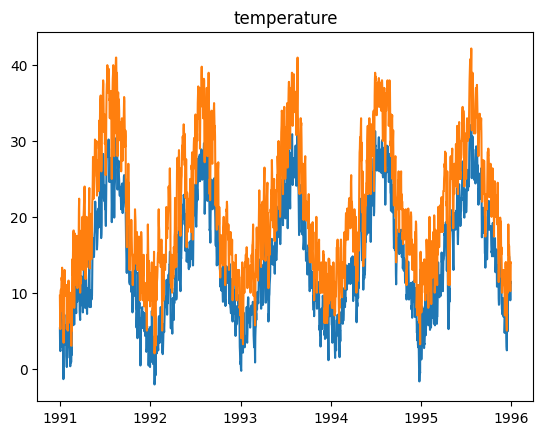

In [21]:
plt.plot(df['date'], df['avg_temp'])
plt.plot(df['date'], df['max_temp'])
plt.title('temperature')
plt.show()


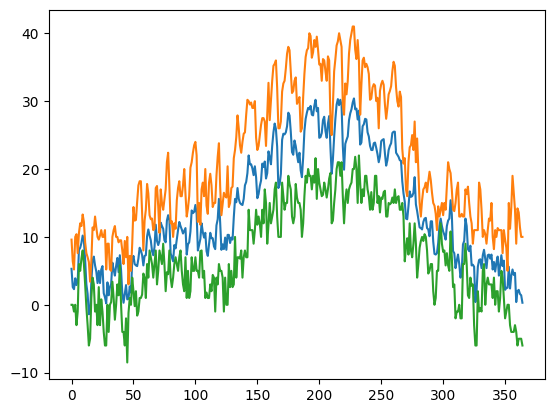

In [22]:
y1991_temp = df.iloc[:365, 3]
plt.plot(y1991_temp)
y1991_temp_max = df.iloc[:365, 4]
plt.plot(y1991_temp_max)
y1991_temp_min = df.iloc[:365, 5]
plt.plot(y1991_temp_min)
plt.show()

In [32]:
fig = px.box(df, 'month', 'avg_temp')
fig.update_layout(title='Temperature')
fig.show()

### atmospheric phenomena exploratory

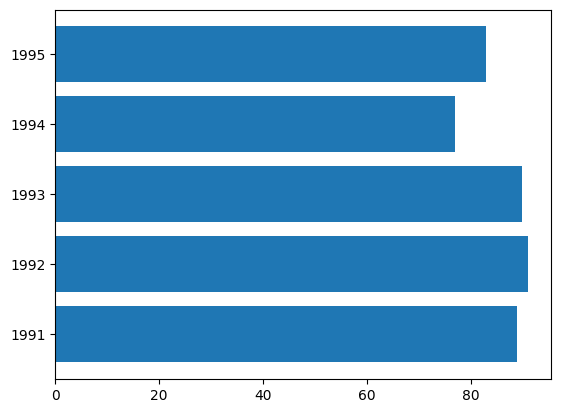

In [25]:
rain = df['occ_Rain'].groupby(df['year']).sum()
years=['1991', '1992', '1993', '1994', '1995']
plt.barh(years, rain)
plt.show()

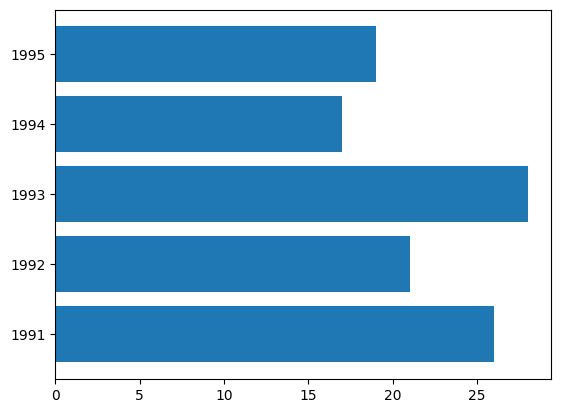

In [26]:
fog = df['occ_Fog'].groupby(df['year']).sum()
years=['1991', '1992', '1993', '1994', '1995']
plt.barh(years, fog)
plt.show()

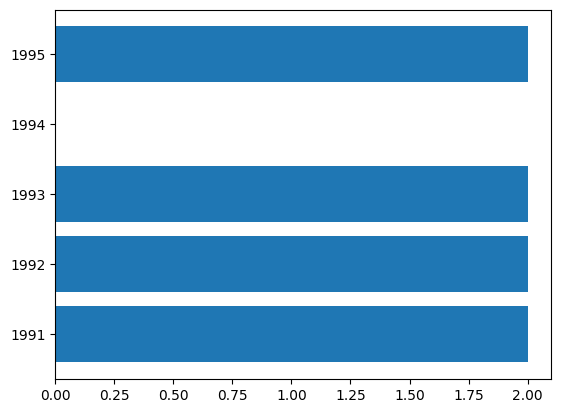

In [27]:
snow = df['occ_Snow'].groupby(df['year']).sum()
years=['1991', '1992', '1993', '1994', '1995']
plt.barh(years, snow)
plt.show()

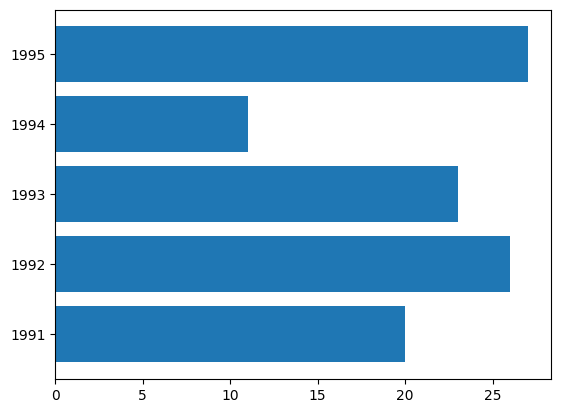

In [28]:
thunder = df['occ_Thunder'].groupby(df['year']).sum()
years=['1991', '1992', '1993', '1994', '1995']
plt.barh(years, thunder)
plt.show()